<a href="https://colab.research.google.com/github/djihane19/Classifying-Emails-using-Llama/blob/main/Project_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Qu’est-ce que l’analyse des sentiments**
L’analyse des sentiments, également appelée exploration des opinions  (opinion mining) ou intelligence artificielle des émotions, est une technique de traitement du langage naturel (NLP) qui détermine si une phrase ou un document donné (data textuelle) est positif, négatif ou neutre comme les textes sentimentaux disponibles sur les sites de réseaux sociaux qui se composent de trois éléments (3Os):


*   Opinion Holder (le détenteur de l'opinion) : l'utilisateur qui donne son avis/opinion.
*   Object (l'objet) : l'entité sur laquelle l'avis est exprimé.
*   Opinion : l'avis réel présent sous forme de texte.
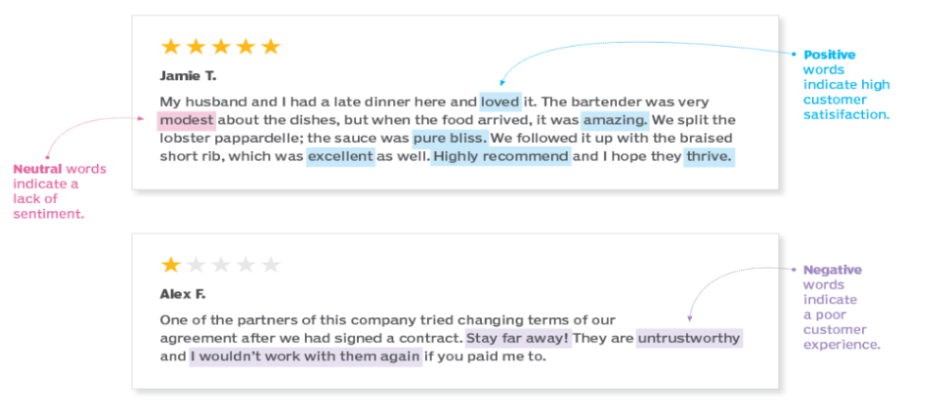

---



**Pourquoi l'analyse des sentiments est-elle importante ?**
*   Fournir des résultats plus objectifs grâce aux avis des clients.
*   Parvenir à une plus grande évolutivité des programmes de business intelligence.
*   Surveiller en temps réel la réputation de la marque.


---


**Cas d'utilisation de l'analyse des sentiments:**
*   Améliorer l'assistance à la clientèle.
*   Renforcer la présence de la marque.
*   Mener des études de marché.


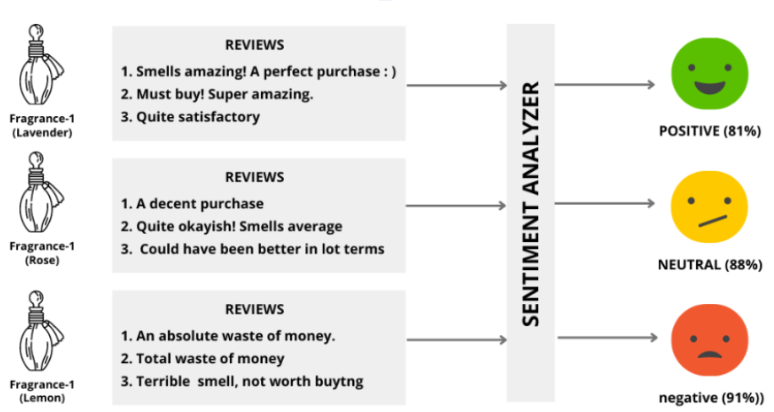

---






Figure 2 : illustration de l'évaluation et de la classification des avis.

# **Le processus de l’analyse**


1.   **Collecte des données** : Cette étape consiste à collecter les données textuelles à analyser à partir de différentes sources telles que les réponses à des sondages, des critiques en ligne ou encore des commentaires sur les réseaux sociaux.
2.   **Prétraitement des données** : Cette étape implique le nettoyage du texte en supprimant la ponctuation, les caractères spéciaux, les chiffres, et en effectuant la lemmatisation(stemming) pour réduire les mots à leur forme de base.

3. **Analyse de données** :

*   Extraction des caractéristiques: identifier les aspects pertinents pour l'analyse.
*   Vectorisation: Convertir les caractéristiques en format numérique.

4.   **Classification des sentiments**: Utiliser les caractéristiques extraites pour classer les données vectorisées en catégories comme positives , négatives ou neutres. Cela se fait généralement à l’aide d’algorithmes d’apprentissage automatique adapté à la tâche d'analyse des sentiments, comme Naive Bayes, Random Forest ou SVM (Entraînement du modèle).
5. **Analyse de polarité**: Après classification, les textes sont séparés en groupes indiquant leur polarité sentimentale — négative ou positive.
6. **Évaluation du modèle** : Mesurez la performance du modèle en utilisant des métriques telles que la précision, le rappel et le F1-score pour évaluer sa capacité à prédire avec précision les sentiments.

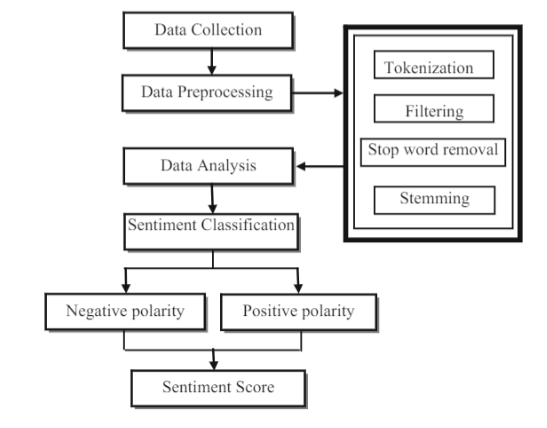


---



# **Random forest**

#**Importation des bibliothèques nécessaires**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

from google.colab import files
import io

uploaded = files.upload()

# Chargez le fichier CSV sélectionné
filename = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[filename]))
#data = pd.read_csv("/content/dataFinance.csv")
data.head()

# **Prétraitement des données**

In [ ]:

# Lowercase and remove extra whitespace
data['Sentence_clean'] = data['Sentence'].apply(lambda x: ' '.join(x.lower().strip() for x in x.split()))


# Remove stopwords
stop_words = set(stopwords.words('english'))
data['Sentence_clean'] = data['Sentence_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['Sentence_clean'] = data['Sentence_clean'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))



#enelver la ponctuation
data['Sentence_clean']=data['Sentence_clean'].str.replace('[{}]'.format(string.punctuation), '', regex=True)
data.head()


#make a sentiment Label column
def label_sentiment(row):
    if row == 'positive':
        return +1
    elif row == 'negative':
        return -1
    else:
        return 0

data['sentiment_label'] = data['Sentiment'].apply(label_sentiment)
data.head()

,Sentence,Sentiment,Sentence_clean,sentiment_label
0,The GeoSolutions technology will leverage Bene...,positive,geosolutions technology leverage benefon s gps...,1
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi lows 150 250 bk real possibility,-1
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter 2010 componenta s net sale doubl...,1
3,According to the Finnish-Russian Chamber of Co...,neutral,according finnishrussian chamber commerce maj...,0
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remaining 224 percent...,0


# **Diviser le jeu de données en ensembles d'entraînement et de test**

In [ ]:
#Create a train and test split
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data,test_size = 0.20)
print('Size of train_data is :', train_data.shape)
print('Size of test_data is :', test_data.shape)


Size of train_data is : (4673, 4)
Size of test_data is : (1169, 4)


# **Analyse de données**

In [ ]:
#Feature Extraction & Vectorisation

import gc
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer()

train_matrix = vectorizer.transform(train_data['Sentence_clean'].values.astype('U'))
test_matrix = vectorizer.transform(test_data['Sentence_clean'].values.astype('U'))

gc.collect()

31

#**Entraînement du modèle**

In [ ]:
#Modeling
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
rf = clf.fit(train_matrix,train_data['sentiment_label'])

#**Analyse de polarité**

In [ ]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix, classification_report
y_pred = rf.predict(test_matrix)
cm = confusion_matrix(test_data.sentiment_label,y_pred)

print(cm)

NameError: name 'rf' is not defined

Text(50.722222222222214, 0.5, 'Truth')

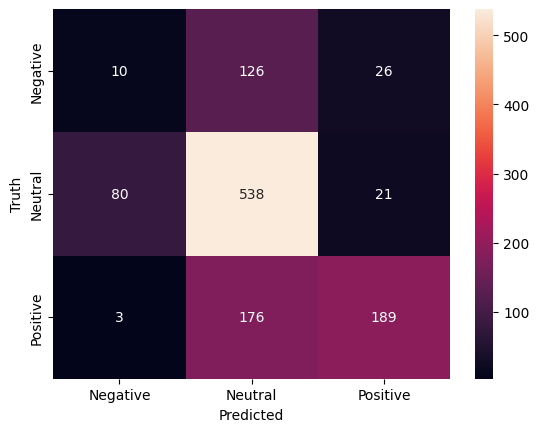

In [ ]:
#Plot the confusion matrix given the true and predicted labels
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Évaluation du modèle**

In [ ]:
#Measure Model Performance
y_pred = rf.predict(test_matrix)
y_test=test_data['sentiment_label']
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
#Measure Model Accuracy
accuracy = accuracy_score(y_test, y_pred)


print("F1 Score: ", f1)
print("Accuracy: ", accuracy ,"\n")
print("precision: ", precision)
print("recall: ", recall,"\n")

print(classification_report(y_test, y_pred))

F1 Score:  0.630453378956373
Accuracy:  0.630453378956373 

precision:  0.630453378956373
recall:  0.630453378956373 

              precision    recall  f1-score   support

          -1       0.11      0.06      0.08       162
           0       0.64      0.84      0.73       639
           1       0.80      0.51      0.63       368

    accuracy                           0.63      1169
   macro avg       0.52      0.47      0.48      1169
weighted avg       0.62      0.63      0.61      1169



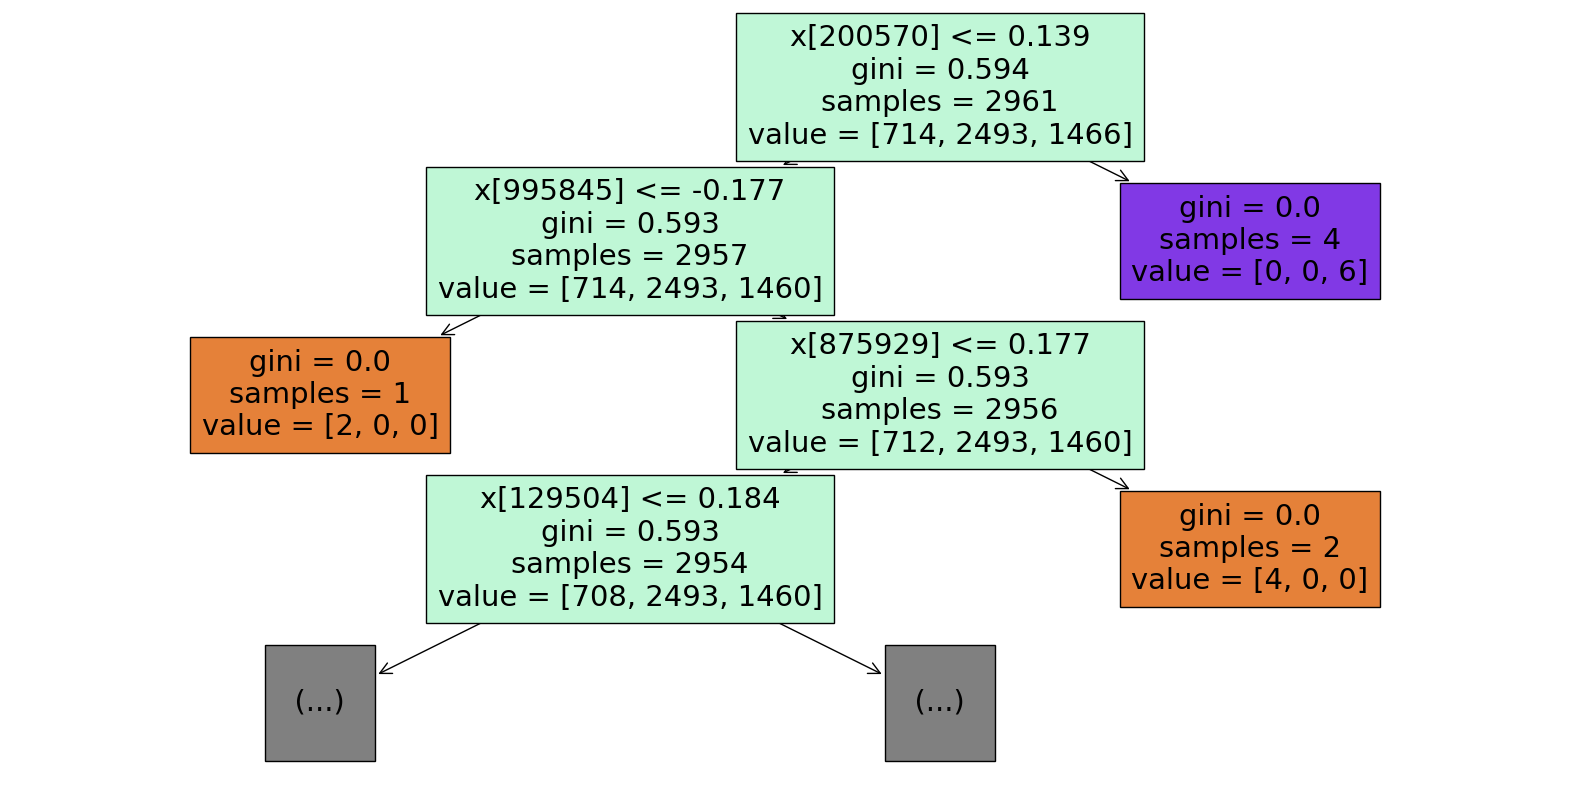

In [ ]:
#Visualiser l'arbre de décision (3 niveaux)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Création et entraînement de la forêt aléatoire
clf = RandomForestClassifier(n_estimators=2)
# Utiliser un petit nombre d'arbres pour la simplicité
clf.fit(train_matrix, train_data['sentiment_label'])

# Choisissez un arbre à visualiser
# Ici, nous sélectionnons le premier arbre (clf.estimators_[0])
single_tree = clf.estimators_[0]

# Visualisation de l'arbre avec plot_tree
plt.figure(figsize=(20,10))  # Définissez une grande taille de figure pour voir clairement l'arbre
plot_tree(single_tree, filled=True, max_depth=3)
plt.show()  # Affichez la figure avec l'arbre

# **SVM**

#**Importation des bibliothèques nécessaires**





In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score


In [ ]:
# Step 1: Load the  preprocessed  dataset

text = data['Sentence_clean'].values
labels = data['sentiment_label'].values


#**Diviser le jeu de données en ensembles d'entraînement et de test**

In [ ]:
# Step 2: Split the dataset into training and testing sets
text_train, text_test, labels_train, labels_test = train_test_split(text, labels, test_size=0.2, random_state=42)

# **Analyse de données**

In [ ]:
# Step 3: Convert text data into numerical feature vectors using HashingVectorizer
vectorizer = HashingVectorizer()
features_train = vectorizer.transform(text_train)
features_test = vectorizer.transform(text_test)

#**Entraînement du modèle**

In [ ]:
# Step 4: Train the SVM model
svm = SVC(kernel='linear')
svm.fit(features_train, labels_train)

# Step 5: Make predictions and calculate F1 score and accuracy
predictions = svm.predict(features_test)


#**Analyse de polarité**

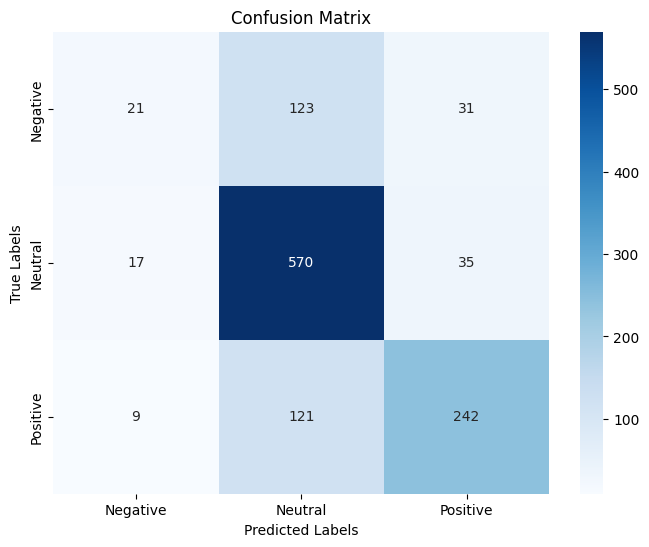

In [ ]:
# Calcul de la matrice de confusion
cm = confusion_matrix(labels_test, predictions)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# **Évaluation du modèle**

In [ ]:
f1 = f1_score(labels_test, predictions, average='micro')
accuracy = accuracy_score(labels_test, predictions)
precision = precision_score(labels_test, predictions, average='micro')
recall = recall_score(labels_test, predictions, average='micro')


print("F1 Score: ", f1)
print("Accuracy: ", accuracy ,"\n")
print("precision: ", precision)
print("recall: ", recall)
print(classification_report(labels_test, predictions))

F1 Score:  0.7125748502994012
Accuracy:  0.7125748502994012 

precision:  0.7125748502994012
recall:  0.7125748502994012
              precision    recall  f1-score   support

          -1       0.45      0.12      0.19       175
           0       0.70      0.92      0.79       622
           1       0.79      0.65      0.71       372

    accuracy                           0.71      1169
   macro avg       0.64      0.56      0.56      1169
weighted avg       0.69      0.71      0.68      1169



#**Naive Bayes**

#**Importation des bibliothèques nécessaires**


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Step 1: Load the  preprocessed  dataset

X = data['Sentence_clean'].values
y = data['sentiment_label'].values

#**Diviser le jeu de données en ensembles d'entraînement et de test**

In [ ]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Analyse de données**

In [ ]:
# Step 3: Convert text data into numerical feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

#**Entraînement du modèle**

In [ ]:
# Step 4: Train the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_counts, y_train)

# Step 5: Make predictions on the test set
predictions = nb_model.predict(X_test_counts)

#**Analyse de polarité**


Matrice de Confusion :
[[ 51  78  46]
 [ 55 514  53]
 [ 28 103 241]]


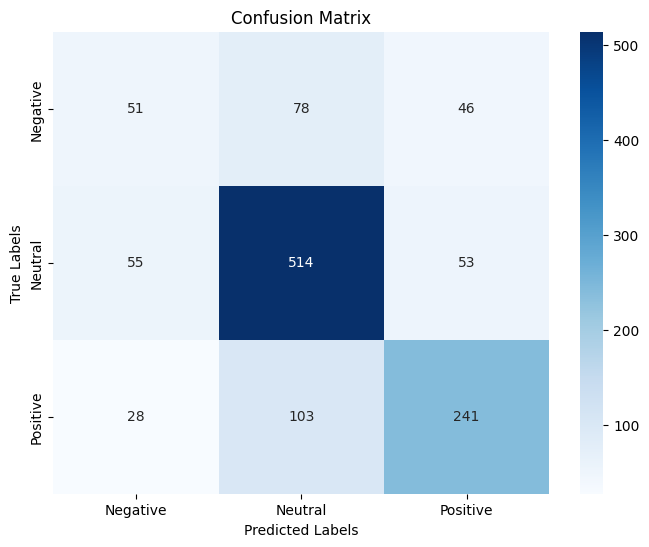

In [ ]:
# Matrice de Confusion et Rapport de Classification pour SVM
cm = confusion_matrix(y_test, predictions)
print("\nMatrice de Confusion :")
print(cm)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Évaluation du modèle**

In [ ]:
# Step 6: Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='micro')
precision = precision_score(y_test,predictions, average='micro')
recall = recall_score(y_test,predictions, average='micro')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("precision: ", precision)
print("recall: ", recall)
print(classification_report(y_test, predictions))

Accuracy: 0.6894781864841745
F1 Score: 0.6894781864841745
precision:  0.6894781864841745
recall:  0.6894781864841745
              precision    recall  f1-score   support

          -1       0.38      0.29      0.33       175
           0       0.74      0.83      0.78       622
           1       0.71      0.65      0.68       372

    accuracy                           0.69      1169
   macro avg       0.61      0.59      0.60      1169
weighted avg       0.68      0.69      0.68      1169





---


# **Constatations** :

**SVM** présente la meilleure performance à la fois en termes de précision et de score F1. Cela indique que, pour cet ensemble de données spécifique, SVM est le plus compétent à classifier correctement les nouvelles instances, et il équilibre le mieux la précision et le rappel.

**Naive Bayes** affiche une performance intermédiaire. Malgré ses hypothèses simplistes d'indépendance des caractéristiques, il se comporte de manière assez solide et dépasse Random Forest en précision et score F1.

**Random Forest** présente les scores les plus bas dans cet ensemble. Cela pourrait être dû à plusieurs raisons, comme un surajustement sur l'ensemble d'entraînement, la nécessité de plus de données pour un meilleur apprentissage, ou peut-être le besoin d'un réglage des hyperparamètres pour améliorer sa performance.

Le choix du meilleur modèle dépendra des objectifs spécifiques, des contraintes de ressources (temps de calcul, mémoire, etc.), et de l'importance relative de la précision par rapport au rappel dans l'application. Par exemple, dans un contexte où les faux positifs sont très coûteux, vous pourriez privilégier un modèle avec une meilleure précision même si le score F1 est légèrement inférieur.
